-----
# Método de Euler para aproximar soluciones  de una ecuación diferencial
-----

##Ejemplo 1



Suponga la siguiente ecuacion diferncial
$$ \dfrac{d N}{dt} = -\lambda N, $$
donde $N$ es la cantidad de átomos presentes de un cierto elemento, $\lambda$ es la constante (positiva) de decaimiento radiactivo y $t$ es el tiempo medido en segundos. Suponiendo que inicialmente se tenian $10^6$ atomos radiactivos y que la constante de decaimiento es de $0.05~\rm{s}^{-1}$, realice:

- Un gráfico de la función $N$ en el tiempo.

- Aproxime el número de átomos del elemento radiactivo que estarán presentes después de $4$ minutos.

**Solución**

Usando un ciclo for:

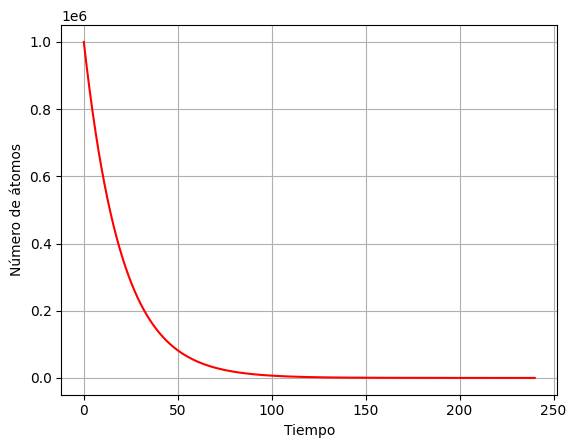

In [ ]:
#importamos las librerias de numpy

import numpy as np
import matplotlib.pyplot as plt


Lambda = 0.05

#Defino la función
def f(t, y):
  return -Lambda * y

#PARAMETROS
t0 = 0
tf = 240 # Segundos equivalentes a 4 minutos!
dt = 0.0001

#lista de tiempos
t = np.arange(t0,tf,dt)

#Numero de tiempos
N = len(t)

#lista los valores de la función
y = np.zeros_like(t)

#asigno el valor inicial
y[0] =  10**6

#Aplicamos la formula de Euler
for i in range( N-1 ):
    y[i+1] = y[i] +  dt* f(t[i],y[i])


plt.plot(t, y,'-r')
plt.grid()
plt.xlabel('Tiempo')
plt.ylabel('Número de átomos')
plt.show()

In [ ]:
#Valor en 4 minutos = 240 segundos!

print("El numero de atomos presente en 4 minutos es: ", y[-1])


El numero de atomos presente en 4 minutos es:  6.144058749401564


**Comparando con la solucion exacta**

La solución exacta del problema de la EDO es:

$$N = N_0 \ e^{-\lambda t}$$

Por lo tanto:

In [ ]:
def exacta(t):
    return y[0] * np.exp(- Lambda * t)

Comparando los gráficos y obteniendo errores:

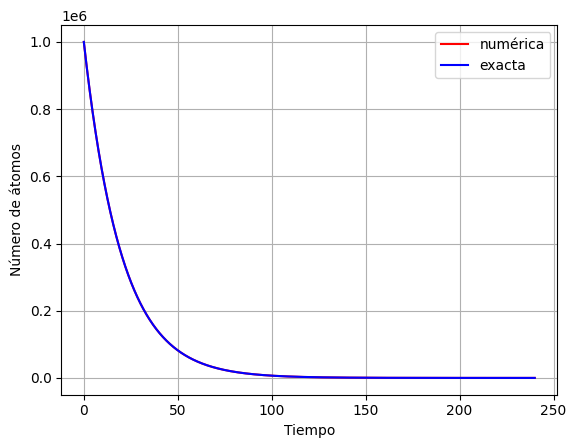

In [ ]:
plt.plot(t,         y,'-r', label='numérica')
plt.plot(t, exacta(t),'-b', label='exacta')
plt.grid()
plt.xlabel('Tiempo')
plt.ylabel('Número de átomos')
plt.legend()
plt.show()

- Calculando la diferencia

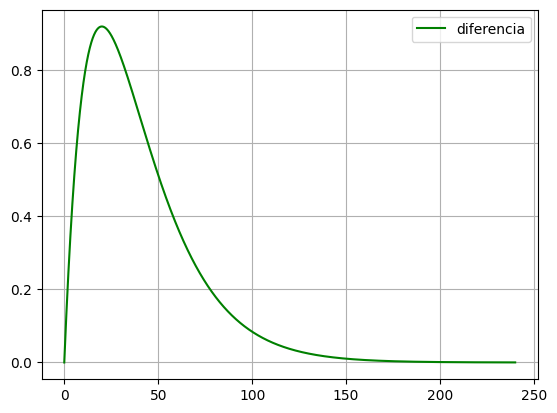

In [ ]:
plt.plot(t, np.abs( exacta(t) - y )  ,'-g', label='diferencia')
plt.grid()
plt.legend()
plt.show()

- Mostrando la diferencia en escala logaritmica (es mas adecuado)

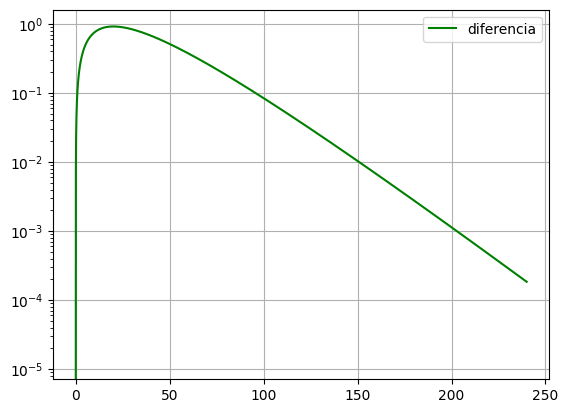

In [ ]:
plt.plot(t, np.abs( exacta(t) - y )  ,'-g', label='diferencia')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

Note que el método de Euler es de orden $dt$ y la derivada de la función y por lo tanto depende del tamaño de estos (es fundamental tener idea de esto).  




##Ejemplo 2

Suponga la siguiente ecuacion diferncial
$$ \dfrac{d P}{dt} =  \lambda P, $$
donde $N$ es la cantidad de bacterias presentes de un cierto recipiente elemento, $\lambda$ es la constante de crecimiento $t$ es el tiempo medido en dias. Suponiendo que inicialmente se tenian $10$ bacterias y que la constante de de crecimiento es 0.5:

- Un gráfico de la función $P$ en el tiempo.

- Aproxime la poblacion de bacterias despues de 20 dias.

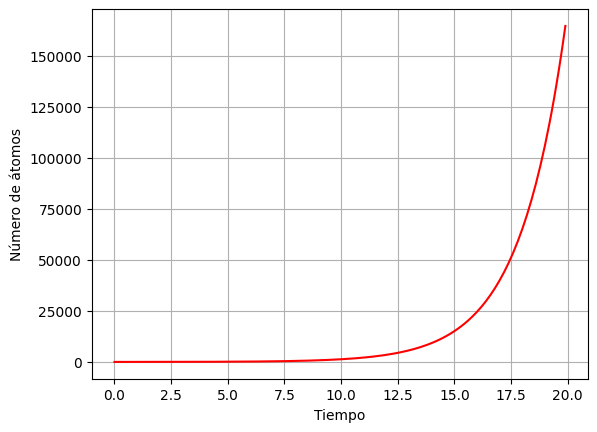

In [ ]:
#importamos las librerias de numpy

import numpy as np
import matplotlib.pyplot as plt


Lambda = 0.5

#Defino la función
def f(t, y):
  return Lambda * y

#PARAMETROS
t0 = 0
tf = 20 # Segundos equivalentes a 4 minutos!
dt = 0.1

#lista de tiempos
t = np.arange(t0,tf,dt)

#Numero de tiempos
N = len(t)

#lista los valores de la función
y = np.zeros_like(t)

#asigno el valor inicial
y[0] =  10

#Aplicamos la formula de Euler
for i in range( N-1 ):
    y[i+1] = y[i] +  dt* f(t[i],y[i])


plt.plot(t, y,'-r')
plt.grid()
plt.xlabel('Tiempo')
plt.ylabel('Número de átomos')
plt.show()



**Comparando con la solucion exacta**

La solución exacta del problema de la EDO es:

$$P = P_0 \ e^{\lambda t}$$

Por lo tanto:

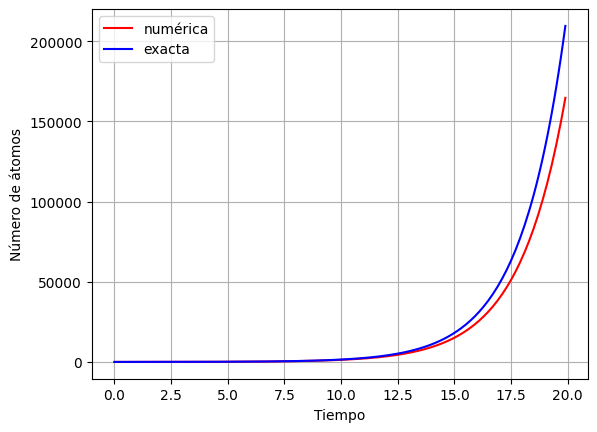

In [ ]:
def exacta(t):
    return y[0] * np.exp(  Lambda * t)



plt.plot(t,         y,'-r', label='numérica')
plt.plot(t, exacta(t),'-b', label='exacta')
plt.grid()
plt.xlabel('Tiempo')
plt.ylabel('Número de átomos')
plt.legend()
plt.show()

**Mostrando la diferencia en escala logaritmica**

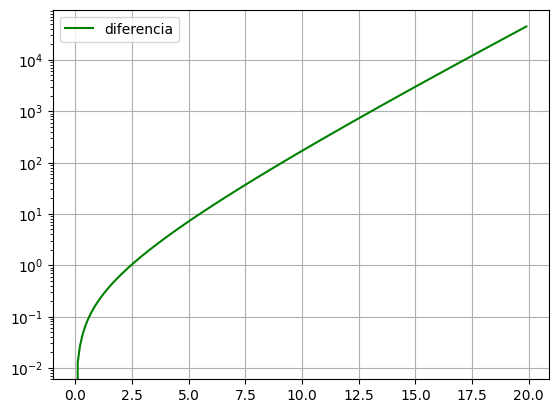

In [ ]:
plt.plot(t, np.abs( exacta(t) - y )  ,'-g', label='diferencia')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

**Conclusion :** las soluciones a largo plazo con el metodo de Euler pueden tender a dañarse si la derivada es creciente!

-----
#Solucion de sistema de EDO usando metodo de Euler y Adams
-----

Usando la fisica Newtoniana se obtiene la ecuación de movimiento del pendulo

\begin{equation}
\dfrac{d^2 \theta}{d t^2} + \dfrac{g}{l}\sin\theta  = 0 .
\end{equation}

Esta ecuación es dificil de solucionar de forma exacta por que es NO lineal. Ademas, como es una ecuacion diferencial de segundo orden, tenemos que definir la nueva variable $\omega = \dfrac{d\theta}{d t}$ y asi obtenemos el sistema:

\begin{eqnarray}
\dfrac{d \theta}{d t} &=& \omega, \\
\dfrac{d \omega}{d t} &=& -\dfrac{g}{l}\sin\theta.
\end{eqnarray}


### Solucion usando el metodo de Euler


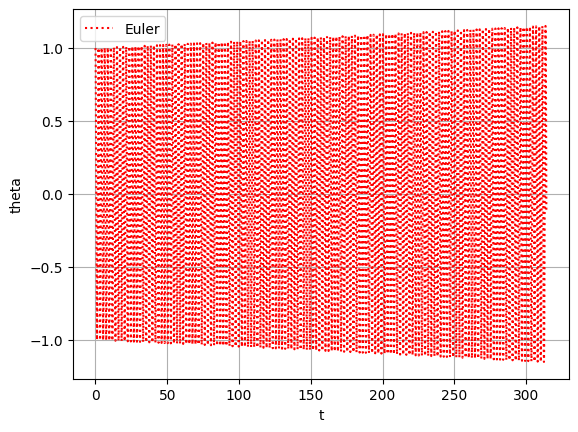

In [3]:
import numpy as np
import matplotlib.pyplot as plt



# Parametros del sistema
g = 9.8
L = 1



#-------Sistema de Ecuaciones diferenciales---------
def F1(theta, omega):
    return omega


def F2(theta, omega):
    return  (- (g/L)*np.sin(theta) )
#--------------------------------------------------



#numero de pasos
t0=0
tf= 100*np.pi
dt = 0.0001
t  = np.arange(t0,tf, dt)



# Condiciones inciales
theta0 = 1.0 # Desplazamiento inicial
omega0 = 0.0 # Velocidad inicial


#Llenando un vector de zeros
theta1 = np.zeros(len(t))
omega1 = np.zeros(len(t))


#Llenando los primeros datos
theta1[0] = theta0
omega1[0] = omega0




#Usando el metodo de Adams
for i in range(0, len(t)-1  ):
  theta1[i+1] = theta1[i] +  (dt) * F1( theta1[i] , omega1[i] )
  omega1[i+1] = omega1[i] +  (dt) * F2( theta1[i] , omega1[i] )


# Graficas
plt.plot(t, theta1, ':r', label ='Euler')
plt.xlabel('t')
plt.ylabel('theta')
plt.grid()
plt.legend()
plt.show()


**NOTA :** Comentar el porque de la diferencia entre los dos graficos y enfatizar en el tamaño de paso.

### Metodo de Adams

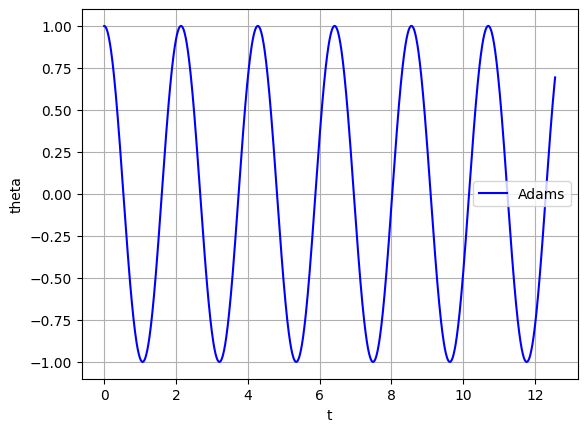

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Parametros del sistema
g = 9.8
L = 1



#-------Sistema de Ecuaciones diferenciales---------
def F1(theta, omega):
    return omega


def F2(theta, omega):
    return  (- (g/L)*np.sin(theta) )
#--------------------------------------------------



#numero de pasos
t0=0
tf= 4*np.pi
dt = 0.01
t  = np.arange(t0,tf, dt)



# Condiciones inciales
theta0 = 1.0 # Desplazamiento inicial
omega0 = 0.0 # Velocidad inicial


#Llenando un vector de zeros
theta2 = np.zeros(len(t))
omega2 = np.zeros(len(t))


#Llenando los primeros datos
theta2[0] = theta0
omega2[0] = omega0



#Usando el metodo de Euler para el primer paso
theta2[1] = theta2[0] + dt * F1( theta2[0] , omega2[0] )
omega2[1] = omega2[0] + dt * F2( theta2[0] , omega2[0] )



#Usando el metodo de Adams
for i in range(1, len(t)-1  ):
  theta2[i+1] = theta2[i] +  (dt/2) * ( 3* F1( theta2[i] , omega2[i] ) - F1( theta2[i-1] , omega2[i-1] ) )
  omega2[i+1] = omega2[i] +  (dt/2) * ( 3* F2( theta2[i] , omega2[i] ) - F2( theta2[i-1] , omega2[i-1] ) )


# Graficas
plt.plot(t, theta2, '-b', label ='Adams')
plt.xlabel('t')
plt.ylabel('theta')
plt.grid()
plt.legend()
plt.show()

### Comparando las dos soluciones

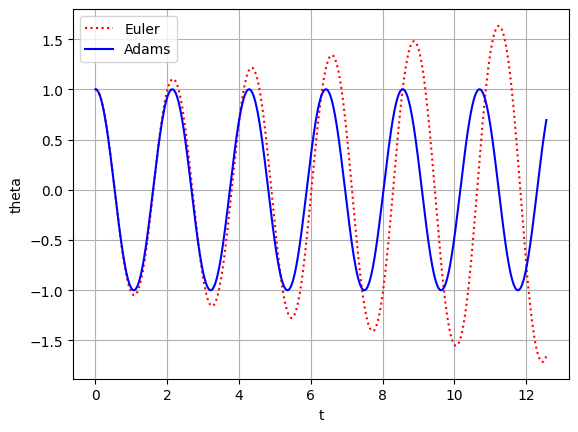

In [ ]:
# Graficas
plt.plot(t, theta1, ':r', label ='Euler')
plt.plot(t, theta2, '-b', label ='Adams')
plt.xlabel('t')
plt.ylabel('theta')
plt.grid()
plt.legend()
plt.show()